<h1>GOAL 1: From Fingerprints, Predict Drug-likeness</h1>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_all = pd.read_csv('acetylcholinesterase_03_bioactivity_data_curated.csv')
df_all

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active
...,...,...,...,...
4690,CHEMBL4293155,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccccc3Cl)CC...,2440.0,intermediate
4691,CHEMBL4282558,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3cccc(Cl)c3)...,2540.0,intermediate
4692,CHEMBL4281727,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccc(Br)cc3)...,3810.0,intermediate
4693,CHEMBL4292349,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3cccc([N+](=...,3460.0,intermediate


<h2>Add Molecular FingerPrint to a Dataset</h2>

From 'canonical smiles' and 'molecule chembl id', process corresponding molecular fingerprints.
I will use PaDEL to generate molecular fingerprints.
*PaDEL: a software to calculate molecular descriptors and fingerprints.

In [29]:
selection = ['canonical_smiles','molecule_chembl_id']
df_selection = df_all[selection]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [30]:
! cat molecule.smi | head -5

CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1	CHEMBL133897
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1	CHEMBL336398
CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1	CHEMBL131588
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F	CHEMBL130628
CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C	CHEMBL130478
cat: write error: Broken pipe


In [31]:
! cat molecule.smi | wc -l

4695


In [32]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [33]:
! bash padel.sh

Processing CHEMBL133897 in molecule.smi (1/4695). 
Processing CHEMBL336398 in molecule.smi (2/4695). Average speed: 22.34 s/mol.
Processing CHEMBL131588 in molecule.smi (3/4695). Average speed: 11.55 s/mol.
Processing CHEMBL130628 in molecule.smi (4/4695). Average speed: 7.99 s/mol.
Processing CHEMBL130478 in molecule.smi (5/4695). Average speed: 6.33 s/mol.
Processing CHEMBL130112 in molecule.smi (6/4695). Average speed: 5.16 s/mol.
Processing CHEMBL130098 in molecule.smi (7/4695). Average speed: 4.42 s/mol.
Processing CHEMBL337486 in molecule.smi (8/4695). Average speed: 3.85 s/mol.
Processing CHEMBL336538 in molecule.smi (9/4695). Average speed: 3.45 s/mol.
Processing CHEMBL131051 in molecule.smi (10/4695). Average speed: 3.12 s/mol.
Processing CHEMBL341437 in molecule.smi (11/4695). Average speed: 2.89 s/mol.
Processing CHEMBL335033 in molecule.smi (12/4695). Average speed: 2.74 s/mol.
Processing CHEMBL122983 in molecule.smi (13/4695). Average speed: 2.56 s/mol.
Processing CHEMBL33

Processing CHEMBL134382 in molecule.smi (107/4695). Average speed: 0.68 s/mol.
Processing CHEMBL59109 in molecule.smi (108/4695). Average speed: 0.68 s/mol.
Processing CHEMBL286990 in molecule.smi (109/4695). Average speed: 0.68 s/mol.
Processing CHEMBL294891 in molecule.smi (110/4695). Average speed: 0.68 s/mol.
Processing CHEMBL1255901 in molecule.smi (111/4695). Average speed: 0.68 s/mol.
Processing CHEMBL89011 in molecule.smi (112/4695). Average speed: 0.68 s/mol.
Processing CHEMBL748 in molecule.smi (113/4695). Average speed: 0.67 s/mol.
Processing CHEMBL50608 in molecule.smi (114/4695). Average speed: 0.67 s/mol.
Processing CHEMBL29300 in molecule.smi (115/4695). Average speed: 0.66 s/mol.
Processing CHEMBL27675 in molecule.smi (116/4695). Average speed: 0.66 s/mol.
Processing CHEMBL435373 in molecule.smi (117/4695). Average speed: 0.66 s/mol.
Processing CHEMBL60167 in molecule.smi (118/4695). Average speed: 0.65 s/mol.
Processing CHEMBL89012 in molecule.smi (119/4695). Average s

Processing CHEMBL132260 in molecule.smi (212/4695). Average speed: 0.55 s/mol.
Processing CHEMBL1204299 in molecule.smi (213/4695). Average speed: 0.55 s/mol.
Processing CHEMBL1204296 in molecule.smi (214/4695). Average speed: 0.55 s/mol.
Processing CHEMBL1202885 in molecule.smi (215/4695). Average speed: 0.55 s/mol.
Processing CHEMBL337453 in molecule.smi (216/4695). Average speed: 0.55 s/mol.
Processing CHEMBL335922 in molecule.smi (217/4695). Average speed: 0.55 s/mol.
Processing CHEMBL132619 in molecule.smi (218/4695). Average speed: 0.55 s/mol.
Processing CHEMBL293316 in molecule.smi (219/4695). Average speed: 0.54 s/mol.
Processing CHEMBL61515 in molecule.smi (220/4695). Average speed: 0.54 s/mol.
Processing CHEMBL442361 in molecule.smi (221/4695). Average speed: 0.54 s/mol.
Processing CHEMBL58034 in molecule.smi (222/4695). Average speed: 0.54 s/mol.
Processing CHEMBL61965 in molecule.smi (223/4695). Average speed: 0.54 s/mol.
Processing CHEMBL59790 in molecule.smi (224/4695). A

Processing CHEMBL340867 in molecule.smi (317/4695). Average speed: 0.47 s/mol.
Processing CHEMBL330004 in molecule.smi (318/4695). Average speed: 0.47 s/mol.
Processing CHEMBL93123 in molecule.smi (319/4695). Average speed: 0.47 s/mol.
Processing CHEMBL420625 in molecule.smi (320/4695). Average speed: 0.47 s/mol.
Processing CHEMBL92460 in molecule.smi (321/4695). Average speed: 0.47 s/mol.
Processing CHEMBL340391 in molecule.smi (322/4695). Average speed: 0.47 s/mol.
Processing CHEMBL92955 in molecule.smi (323/4695). Average speed: 0.47 s/mol.
Processing CHEMBL131210 in molecule.smi (324/4695). Average speed: 0.47 s/mol.
Processing CHEMBL126939 in molecule.smi (325/4695). Average speed: 0.47 s/mol.
Processing CHEMBL329531 in molecule.smi (326/4695). Average speed: 0.47 s/mol.
Processing CHEMBL418955 in molecule.smi (327/4695). Average speed: 0.47 s/mol.
Processing CHEMBL92663 in molecule.smi (328/4695). Average speed: 0.47 s/mol.
Processing CHEMBL131598 in molecule.smi (329/4695). Aver

Processing CHEMBL11514 in molecule.smi (422/4695). Average speed: 0.45 s/mol.
Processing CHEMBL329012 in molecule.smi (423/4695). Average speed: 0.45 s/mol.
Processing CHEMBL60119 in molecule.smi (424/4695). Average speed: 0.45 s/mol.
Processing CHEMBL61221 in molecule.smi (425/4695). Average speed: 0.45 s/mol.
Processing CHEMBL294525 in molecule.smi (426/4695). Average speed: 0.45 s/mol.
Processing CHEMBL274107 in molecule.smi (427/4695). Average speed: 0.45 s/mol.
Processing CHEMBL24457 in molecule.smi (428/4695). Average speed: 0.44 s/mol.
Processing CHEMBL268481 in molecule.smi (429/4695). Average speed: 0.44 s/mol.
Processing CHEMBL25524 in molecule.smi (430/4695). Average speed: 0.44 s/mol.
Processing CHEMBL292121 in molecule.smi (431/4695). Average speed: 0.44 s/mol.
Processing CHEMBL61849 in molecule.smi (432/4695). Average speed: 0.44 s/mol.
Processing CHEMBL278342 in molecule.smi (433/4695). Average speed: 0.44 s/mol.
Processing CHEMBL25149 in molecule.smi (434/4695). Average

Processing CHEMBL286690 in molecule.smi (527/4695). Average speed: 0.41 s/mol.
Processing CHEMBL33727 in molecule.smi (528/4695). Average speed: 0.41 s/mol.
Processing CHEMBL32453 in molecule.smi (529/4695). Average speed: 0.41 s/mol.
Processing CHEMBL62373 in molecule.smi (530/4695). Average speed: 0.41 s/mol.
Processing CHEMBL33161 in molecule.smi (531/4695). Average speed: 0.41 s/mol.
Processing CHEMBL32452 in molecule.smi (532/4695). Average speed: 0.41 s/mol.
Processing CHEMBL33642 in molecule.smi (533/4695). Average speed: 0.41 s/mol.
Processing CHEMBL284369 in molecule.smi (534/4695). Average speed: 0.41 s/mol.
Processing CHEMBL284519 in molecule.smi (535/4695). Average speed: 0.41 s/mol.
Processing CHEMBL32653 in molecule.smi (536/4695). Average speed: 0.41 s/mol.
Processing CHEMBL1127 in molecule.smi (537/4695). Average speed: 0.41 s/mol.
Processing CHEMBL318026 in molecule.smi (538/4695). Average speed: 0.41 s/mol.
Processing CHEMBL319451 in molecule.smi (539/4695). Average s

Processing CHEMBL154848 in molecule.smi (631/4695). Average speed: 0.38 s/mol.
Processing CHEMBL335439 in molecule.smi (632/4695). Average speed: 0.38 s/mol.
Processing CHEMBL344864 in molecule.smi (633/4695). Average speed: 0.38 s/mol.
Processing CHEMBL343344 in molecule.smi (634/4695). Average speed: 0.38 s/mol.
Processing CHEMBL422459 in molecule.smi (635/4695). Average speed: 0.37 s/mol.
Processing CHEMBL147793 in molecule.smi (636/4695). Average speed: 0.37 s/mol.
Processing CHEMBL349791 in molecule.smi (637/4695). Average speed: 0.37 s/mol.
Processing CHEMBL139259 in molecule.smi (638/4695). Average speed: 0.37 s/mol.
Processing CHEMBL158242 in molecule.smi (639/4695). Average speed: 0.37 s/mol.
Processing CHEMBL157327 in molecule.smi (640/4695). Average speed: 0.37 s/mol.
Processing CHEMBL114059 in molecule.smi (641/4695). Average speed: 0.37 s/mol.
Processing CHEMBL139684 in molecule.smi (642/4695). Average speed: 0.37 s/mol.
Processing CHEMBL609718 in molecule.smi (643/4695). 

Processing CHEMBL432376 in molecule.smi (736/4695). Average speed: 0.36 s/mol.
Processing CHEMBL321605 in molecule.smi (737/4695). Average speed: 0.36 s/mol.
Processing CHEMBL106782 in molecule.smi (738/4695). Average speed: 0.36 s/mol.
Processing CHEMBL104334 in molecule.smi (739/4695). Average speed: 0.36 s/mol.
Processing CHEMBL320291 in molecule.smi (740/4695). Average speed: 0.36 s/mol.
Processing CHEMBL315385 in molecule.smi (741/4695). Average speed: 0.36 s/mol.
Processing CHEMBL542543 in molecule.smi (742/4695). Average speed: 0.36 s/mol.
Processing CHEMBL85404 in molecule.smi (743/4695). Average speed: 0.36 s/mol.
Processing CHEMBL106082 in molecule.smi (744/4695). Average speed: 0.36 s/mol.
Processing CHEMBL245079 in molecule.smi (745/4695). Average speed: 0.36 s/mol.
Processing CHEMBL555075 in molecule.smi (746/4695). Average speed: 0.36 s/mol.
Processing CHEMBL106348 in molecule.smi (747/4695). Average speed: 0.36 s/mol.
Processing CHEMBL552832 in molecule.smi (748/4695). A

Processing CHEMBL554453 in molecule.smi (840/4695). Average speed: 0.34 s/mol.
Processing CHEMBL2093019 in molecule.smi (841/4695). Average speed: 0.34 s/mol.
Processing CHEMBL545798 in molecule.smi (842/4695). Average speed: 0.34 s/mol.
Processing CHEMBL1788296 in molecule.smi (843/4695). Average speed: 0.34 s/mol.
Processing CHEMBL541620 in molecule.smi (844/4695). Average speed: 0.34 s/mol.
Processing CHEMBL554055 in molecule.smi (845/4695). Average speed: 0.34 s/mol.
Processing CHEMBL555592 in molecule.smi (846/4695). Average speed: 0.34 s/mol.
Processing CHEMBL556028 in molecule.smi (847/4695). Average speed: 0.34 s/mol.
Processing CHEMBL147033 in molecule.smi (848/4695). Average speed: 0.34 s/mol.
Processing CHEMBL151861 in molecule.smi (849/4695). Average speed: 0.34 s/mol.
Processing CHEMBL545797 in molecule.smi (850/4695). Average speed: 0.34 s/mol.
Processing CHEMBL148760 in molecule.smi (851/4695). Average speed: 0.34 s/mol.
Processing CHEMBL543215 in molecule.smi (852/4695)

Processing CHEMBL1161720 in molecule.smi (944/4695). Average speed: 0.35 s/mol.
Processing CHEMBL1161717 in molecule.smi (945/4695). Average speed: 0.35 s/mol.
Processing CHEMBL1161718 in molecule.smi (946/4695). Average speed: 0.35 s/mol.
Processing CHEMBL1161716 in molecule.smi (947/4695). Average speed: 0.35 s/mol.
Processing CHEMBL188823 in molecule.smi (948/4695). Average speed: 0.35 s/mol.
Processing CHEMBL426441 in molecule.smi (949/4695). Average speed: 0.35 s/mol.
Processing CHEMBL185799 in molecule.smi (950/4695). Average speed: 0.35 s/mol.
Processing CHEMBL186144 in molecule.smi (951/4695). Average speed: 0.35 s/mol.
Processing CHEMBL361869 in molecule.smi (952/4695). Average speed: 0.35 s/mol.
Processing CHEMBL189283 in molecule.smi (953/4695). Average speed: 0.35 s/mol.
Processing CHEMBL362711 in molecule.smi (954/4695). Average speed: 0.35 s/mol.
Processing CHEMBL185976 in molecule.smi (955/4695). Average speed: 0.35 s/mol.
Processing CHEMBL188325 in molecule.smi (956/469

Processing CHEMBL370561 in molecule.smi (1048/4695). Average speed: 0.36 s/mol.
Processing CHEMBL1385 in molecule.smi (1049/4695). Average speed: 0.36 s/mol.
Processing CHEMBL194372 in molecule.smi (1050/4695). Average speed: 0.36 s/mol.
Processing CHEMBL197696 in molecule.smi (1051/4695). Average speed: 0.36 s/mol.
Processing CHEMBL199670 in molecule.smi (1052/4695). Average speed: 0.36 s/mol.
Processing CHEMBL370807 in molecule.smi (1053/4695). Average speed: 0.36 s/mol.
Processing CHEMBL372202 in molecule.smi (1054/4695). Average speed: 0.36 s/mol.
Processing CHEMBL382260 in molecule.smi (1055/4695). Average speed: 0.36 s/mol.
Processing CHEMBL199585 in molecule.smi (1056/4695). Average speed: 0.36 s/mol.
Processing CHEMBL202661 in molecule.smi (1057/4695). Average speed: 0.36 s/mol.
Processing CHEMBL381499 in molecule.smi (1058/4695). Average speed: 0.36 s/mol.
Processing CHEMBL204895 in molecule.smi (1059/4695). Average speed: 0.36 s/mol.
Processing CHEMBL382207 in molecule.smi (1

Processing CHEMBL374184 in molecule.smi (1151/4695). Average speed: 0.36 s/mol.
Processing CHEMBL218940 in molecule.smi (1152/4695). Average speed: 0.36 s/mol.
Processing CHEMBL436302 in molecule.smi (1153/4695). Average speed: 0.36 s/mol.
Processing CHEMBL219406 in molecule.smi (1154/4695). Average speed: 0.36 s/mol.
Processing CHEMBL219405 in molecule.smi (1155/4695). Average speed: 0.36 s/mol.
Processing CHEMBL220294 in molecule.smi (1156/4695). Average speed: 0.36 s/mol.
Processing CHEMBL219400 in molecule.smi (1157/4695). Average speed: 0.36 s/mol.
Processing CHEMBL219172 in molecule.smi (1158/4695). Average speed: 0.36 s/mol.
Processing CHEMBL218939 in molecule.smi (1159/4695). Average speed: 0.36 s/mol.
Processing CHEMBL266084 in molecule.smi (1160/4695). Average speed: 0.36 s/mol.
Processing CHEMBL221811 in molecule.smi (1161/4695). Average speed: 0.36 s/mol.
Processing CHEMBL80619 in molecule.smi (1162/4695). Average speed: 0.36 s/mol.
Processing CHEMBL221794 in molecule.smi (

Processing CHEMBL250688 in molecule.smi (1356/4695). Average speed: 0.37 s/mol.
Processing CHEMBL252723 in molecule.smi (1357/4695). Average speed: 0.37 s/mol.
Processing CHEMBL1523 in molecule.smi (1358/4695). Average speed: 0.37 s/mol.
Processing CHEMBL479291 in molecule.smi (1359/4695). Average speed: 0.37 s/mol.
Processing CHEMBL15056 in molecule.smi (1360/4695). Average speed: 0.37 s/mol.
Processing CHEMBL41 in molecule.smi (1361/4695). Average speed: 0.37 s/mol.
Processing CHEMBL255231 in molecule.smi (1362/4695). Average speed: 0.37 s/mol.
Processing CHEMBL255230 in molecule.smi (1363/4695). Average speed: 0.37 s/mol.
Processing CHEMBL109018 in molecule.smi (1364/4695). Average speed: 0.37 s/mol.
Processing CHEMBL257540 in molecule.smi (1365/4695). Average speed: 0.37 s/mol.
Processing CHEMBL403260 in molecule.smi (1366/4695). Average speed: 0.37 s/mol.
Processing CHEMBL254016 in molecule.smi (1367/4695). Average speed: 0.37 s/mol.
Processing CHEMBL231160 in molecule.smi (1368/4

Processing CHEMBL567532 in molecule.smi (1561/4695). Average speed: 0.37 s/mol.
Processing CHEMBL570158 in molecule.smi (1562/4695). Average speed: 0.37 s/mol.
Processing CHEMBL570159 in molecule.smi (1563/4695). Average speed: 0.37 s/mol.
Processing CHEMBL571730 in molecule.smi (1564/4695). Average speed: 0.37 s/mol.
Processing CHEMBL583855 in molecule.smi (1565/4695). Average speed: 0.37 s/mol.
Processing CHEMBL604478 in molecule.smi (1566/4695). Average speed: 0.37 s/mol.
Processing CHEMBL595115 in molecule.smi (1567/4695). Average speed: 0.37 s/mol.
Processing CHEMBL594870 in molecule.smi (1568/4695). Average speed: 0.37 s/mol.
Processing CHEMBL605303 in molecule.smi (1569/4695). Average speed: 0.37 s/mol.
Processing CHEMBL606348 in molecule.smi (1570/4695). Average speed: 0.37 s/mol.
Processing CHEMBL593933 in molecule.smi (1571/4695). Average speed: 0.37 s/mol.
Processing CHEMBL596236 in molecule.smi (1572/4695). Average speed: 0.37 s/mol.
Processing CHEMBL595114 in molecule.smi 

Processing CHEMBL1084256 in molecule.smi (1765/4695). Average speed: 0.37 s/mol.
Processing CHEMBL140999 in molecule.smi (1766/4695). Average speed: 0.37 s/mol.
Processing CHEMBL141001 in molecule.smi (1767/4695). Average speed: 0.37 s/mol.
Processing CHEMBL138442 in molecule.smi (1768/4695). Average speed: 0.37 s/mol.
Processing CHEMBL141622 in molecule.smi (1769/4695). Average speed: 0.37 s/mol.
Processing CHEMBL140106 in molecule.smi (1770/4695). Average speed: 0.37 s/mol.
Processing CHEMBL141203 in molecule.smi (1771/4695). Average speed: 0.37 s/mol.
Processing CHEMBL142014 in molecule.smi (1772/4695). Average speed: 0.37 s/mol.
Processing CHEMBL140990 in molecule.smi (1773/4695). Average speed: 0.37 s/mol.
Processing CHEMBL142013 in molecule.smi (1774/4695). Average speed: 0.37 s/mol.
Processing CHEMBL141042 in molecule.smi (1775/4695). Average speed: 0.37 s/mol.
Processing CHEMBL140328 in molecule.smi (1776/4695). Average speed: 0.37 s/mol.
Processing CHEMBL141810 in molecule.smi

Processing CHEMBL329733 in molecule.smi (1867/4695). Average speed: 0.37 s/mol.
Processing CHEMBL98497 in molecule.smi (1868/4695). Average speed: 0.37 s/mol.
Processing CHEMBL1083789 in molecule.smi (1869/4695). Average speed: 0.37 s/mol.
Processing CHEMBL258928 in molecule.smi (1870/4695). Average speed: 0.37 s/mol.
Processing CHEMBL1083790 in molecule.smi (1871/4695). Average speed: 0.37 s/mol.
Processing CHEMBL1084092 in molecule.smi (1872/4695). Average speed: 0.37 s/mol.
Processing CHEMBL1084093 in molecule.smi (1873/4695). Average speed: 0.37 s/mol.
Processing CHEMBL1083791 in molecule.smi (1874/4695). Average speed: 0.37 s/mol.
Processing CHEMBL1084094 in molecule.smi (1875/4695). Average speed: 0.37 s/mol.
Processing CHEMBL1084095 in molecule.smi (1876/4695). Average speed: 0.37 s/mol.
Processing CHEMBL1084367 in molecule.smi (1877/4695). Average speed: 0.37 s/mol.
Processing CHEMBL1084368 in molecule.smi (1878/4695). Average speed: 0.37 s/mol.
Processing CHEMBL1084369 in mole

Processing CHEMBL1084544 in molecule.smi (1970/4695). Average speed: 0.38 s/mol.
Processing CHEMBL1084545 in molecule.smi (1971/4695). Average speed: 0.38 s/mol.
Processing CHEMBL427342 in molecule.smi (1972/4695). Average speed: 0.38 s/mol.
Processing CHEMBL185896 in molecule.smi (1973/4695). Average speed: 0.38 s/mol.
Processing CHEMBL325109 in molecule.smi (1974/4695). Average speed: 0.38 s/mol.
Processing CHEMBL362579 in molecule.smi (1975/4695). Average speed: 0.38 s/mol.
Processing CHEMBL189870 in molecule.smi (1976/4695). Average speed: 0.38 s/mol.
Processing CHEMBL360186 in molecule.smi (1977/4695). Average speed: 0.38 s/mol.
Processing CHEMBL187030 in molecule.smi (1978/4695). Average speed: 0.38 s/mol.
Processing CHEMBL188019 in molecule.smi (1979/4695). Average speed: 0.38 s/mol.
Processing CHEMBL1086358 in molecule.smi (1980/4695). Average speed: 0.38 s/mol.
Processing CHEMBL186896 in molecule.smi (1981/4695). Average speed: 0.38 s/mol.
Processing CHEMBL189764 in molecule.s

Processing CHEMBL1642975 in molecule.smi (2072/4695). Average speed: 0.38 s/mol.
Processing CHEMBL1642978 in molecule.smi (2073/4695). Average speed: 0.38 s/mol.
Processing CHEMBL1642987 in molecule.smi (2074/4695). Average speed: 0.38 s/mol.
Processing CHEMBL1642986 in molecule.smi (2075/4695). Average speed: 0.38 s/mol.
Processing CHEMBL1642984 in molecule.smi (2076/4695). Average speed: 0.38 s/mol.
Processing CHEMBL1642983 in molecule.smi (2077/4695). Average speed: 0.38 s/mol.
Processing CHEMBL1642973 in molecule.smi (2078/4695). Average speed: 0.38 s/mol.
Processing CHEMBL1642985 in molecule.smi (2079/4695). Average speed: 0.38 s/mol.
Processing CHEMBL1642981 in molecule.smi (2080/4695). Average speed: 0.38 s/mol.
Processing CHEMBL1642972 in molecule.smi (2081/4695). Average speed: 0.38 s/mol.
Processing CHEMBL1642971 in molecule.smi (2082/4695). Average speed: 0.38 s/mol.
Processing CHEMBL1642982 in molecule.smi (2083/4695). Average speed: 0.38 s/mol.
Processing CHEMBL1642970 in 

Processing CHEMBL1084211 in molecule.smi (2175/4695). Average speed: 0.38 s/mol.
Processing CHEMBL1084210 in molecule.smi (2176/4695). Average speed: 0.38 s/mol.
Processing CHEMBL1766150 in molecule.smi (2177/4695). Average speed: 0.38 s/mol.
Processing CHEMBL1082981 in molecule.smi (2178/4695). Average speed: 0.38 s/mol.
Processing CHEMBL1082980 in molecule.smi (2179/4695). Average speed: 0.38 s/mol.
Processing CHEMBL1082979 in molecule.smi (2180/4695). Average speed: 0.38 s/mol.
Processing CHEMBL1085505 in molecule.smi (2181/4695). Average speed: 0.38 s/mol.
Processing CHEMBL1082978 in molecule.smi (2182/4695). Average speed: 0.38 s/mol.
Processing CHEMBL1766149 in molecule.smi (2183/4695). Average speed: 0.38 s/mol.
Processing CHEMBL1766148 in molecule.smi (2184/4695). Average speed: 0.38 s/mol.
Processing CHEMBL1766147 in molecule.smi (2185/4695). Average speed: 0.38 s/mol.
Processing CHEMBL1766146 in molecule.smi (2186/4695). Average speed: 0.38 s/mol.
Processing CHEMBL1766145 in 

Processing CHEMBL1819179 in molecule.smi (2277/4695). Average speed: 0.39 s/mol.
Processing CHEMBL1819180 in molecule.smi (2278/4695). Average speed: 0.39 s/mol.
Processing CHEMBL1834076 in molecule.smi (2279/4695). Average speed: 0.39 s/mol.
Processing CHEMBL1834060 in molecule.smi (2280/4695). Average speed: 0.39 s/mol.
Processing CHEMBL1834061 in molecule.smi (2281/4695). Average speed: 0.39 s/mol.
Processing CHEMBL1834062 in molecule.smi (2282/4695). Average speed: 0.39 s/mol.
Processing CHEMBL1834063 in molecule.smi (2283/4695). Average speed: 0.39 s/mol.
Processing CHEMBL1834064 in molecule.smi (2284/4695). Average speed: 0.39 s/mol.
Processing CHEMBL1834065 in molecule.smi (2285/4695). Average speed: 0.39 s/mol.
Processing CHEMBL1834066 in molecule.smi (2286/4695). Average speed: 0.39 s/mol.
Processing CHEMBL1834067 in molecule.smi (2287/4695). Average speed: 0.39 s/mol.
Processing CHEMBL1834068 in molecule.smi (2288/4695). Average speed: 0.39 s/mol.
Processing CHEMBL1834069 in 

Processing CHEMBL1940618 in molecule.smi (2380/4695). Average speed: 0.40 s/mol.
Processing CHEMBL1940619 in molecule.smi (2381/4695). Average speed: 0.40 s/mol.
Processing CHEMBL1952057 in molecule.smi (2382/4695). Average speed: 0.40 s/mol.
Processing CHEMBL1952058 in molecule.smi (2383/4695). Average speed: 0.40 s/mol.
Processing CHEMBL1952059 in molecule.smi (2384/4695). Average speed: 0.40 s/mol.
Processing CHEMBL1952060 in molecule.smi (2385/4695). Average speed: 0.40 s/mol.
Processing CHEMBL1952061 in molecule.smi (2386/4695). Average speed: 0.40 s/mol.
Processing CHEMBL1952062 in molecule.smi (2387/4695). Average speed: 0.40 s/mol.
Processing CHEMBL1952063 in molecule.smi (2388/4695). Average speed: 0.40 s/mol.
Processing CHEMBL1952064 in molecule.smi (2389/4695). Average speed: 0.40 s/mol.
Processing CHEMBL1952065 in molecule.smi (2390/4695). Average speed: 0.40 s/mol.
Processing CHEMBL1952066 in molecule.smi (2391/4695). Average speed: 0.40 s/mol.
Processing CHEMBL1952067 in 

Processing CHEMBL2071428 in molecule.smi (2482/4695). Average speed: 0.40 s/mol.
Processing CHEMBL1952289 in molecule.smi (2483/4695). Average speed: 0.40 s/mol.
Processing CHEMBL2088687 in molecule.smi (2484/4695). Average speed: 0.40 s/mol.
Processing CHEMBL2088780 in molecule.smi (2485/4695). Average speed: 0.40 s/mol.
Processing CHEMBL2088781 in molecule.smi (2486/4695). Average speed: 0.40 s/mol.
Processing CHEMBL2088782 in molecule.smi (2487/4695). Average speed: 0.40 s/mol.
Processing CHEMBL2088783 in molecule.smi (2488/4695). Average speed: 0.40 s/mol.
Processing CHEMBL2088784 in molecule.smi (2489/4695). Average speed: 0.40 s/mol.
Processing CHEMBL2088785 in molecule.smi (2490/4695). Average speed: 0.40 s/mol.
Processing CHEMBL2088786 in molecule.smi (2491/4695). Average speed: 0.40 s/mol.
Processing CHEMBL2147460 in molecule.smi (2492/4695). Average speed: 0.40 s/mol.
Processing CHEMBL2147462 in molecule.smi (2493/4695). Average speed: 0.40 s/mol.
Processing CHEMBL2147461 in 

Processing CHEMBL2380677 in molecule.smi (2686/4695). Average speed: 0.40 s/mol.
Processing CHEMBL2380676 in molecule.smi (2687/4695). Average speed: 0.40 s/mol.
Processing CHEMBL2380675 in molecule.smi (2688/4695). Average speed: 0.40 s/mol.
Processing CHEMBL2380674 in molecule.smi (2689/4695). Average speed: 0.40 s/mol.
Processing CHEMBL2380673 in molecule.smi (2690/4695). Average speed: 0.40 s/mol.
Processing CHEMBL2380672 in molecule.smi (2691/4695). Average speed: 0.40 s/mol.
Processing CHEMBL2380671 in molecule.smi (2692/4695). Average speed: 0.40 s/mol.
Processing CHEMBL2380670 in molecule.smi (2693/4695). Average speed: 0.40 s/mol.
Processing CHEMBL2380669 in molecule.smi (2694/4695). Average speed: 0.40 s/mol.
Processing CHEMBL2380668 in molecule.smi (2695/4695). Average speed: 0.40 s/mol.
Processing CHEMBL2381401 in molecule.smi (2696/4695). Average speed: 0.40 s/mol.
Processing CHEMBL2386558 in molecule.smi (2697/4695). Average speed: 0.40 s/mol.
Processing CHEMBL2396914 in 

Processing CHEMBL2441673 in molecule.smi (2788/4695). Average speed: 0.40 s/mol.
Processing CHEMBL2441672 in molecule.smi (2789/4695). Average speed: 0.40 s/mol.
Processing CHEMBL2441671 in molecule.smi (2790/4695). Average speed: 0.40 s/mol.
Processing CHEMBL2441670 in molecule.smi (2791/4695). Average speed: 0.40 s/mol.
Processing CHEMBL2441669 in molecule.smi (2792/4695). Average speed: 0.40 s/mol.
Processing CHEMBL2441668 in molecule.smi (2793/4695). Average speed: 0.40 s/mol.
Processing CHEMBL2441667 in molecule.smi (2794/4695). Average speed: 0.40 s/mol.
Processing CHEMBL2441666 in molecule.smi (2795/4695). Average speed: 0.40 s/mol.
Processing CHEMBL2441665 in molecule.smi (2796/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3087683 in molecule.smi (2797/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3087682 in molecule.smi (2798/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3087681 in molecule.smi (2799/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3087680 in 

Processing CHEMBL3116280 in molecule.smi (2890/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3116279 in molecule.smi (2891/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3116278 in molecule.smi (2892/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3122169 in molecule.smi (2893/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3122168 in molecule.smi (2894/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3122167 in molecule.smi (2895/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3122166 in molecule.smi (2896/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3122150 in molecule.smi (2897/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3122149 in molecule.smi (2898/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3122148 in molecule.smi (2899/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3122147 in molecule.smi (2900/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3122146 in molecule.smi (2901/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3122145 in 

Processing CHEMBL3261985 in molecule.smi (2992/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3261986 in molecule.smi (2993/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3261987 in molecule.smi (2994/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3261988 in molecule.smi (2995/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3261989 in molecule.smi (2996/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3261990 in molecule.smi (2997/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3261991 in molecule.smi (2998/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3261992 in molecule.smi (2999/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3262658 in molecule.smi (3000/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3262661 in molecule.smi (3001/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3262662 in molecule.smi (3002/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3262663 in molecule.smi (3003/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3262664 in 

Processing CHEMBL3338387 in molecule.smi (3194/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3338386 in molecule.smi (3195/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3343884 in molecule.smi (3196/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3343885 in molecule.smi (3197/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3343920 in molecule.smi (3198/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3343922 in molecule.smi (3199/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3343882 in molecule.smi (3200/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3343923 in molecule.smi (3201/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3343924 in molecule.smi (3202/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3343925 in molecule.smi (3203/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3343926 in molecule.smi (3204/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3343927 in molecule.smi (3205/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3343928 in 

Processing CHEMBL3415564 in molecule.smi (3296/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3415565 in molecule.smi (3297/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3415566 in molecule.smi (3298/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3415568 in molecule.smi (3299/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3415569 in molecule.smi (3300/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3415570 in molecule.smi (3301/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3415573 in molecule.smi (3302/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3415574 in molecule.smi (3303/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3415575 in molecule.smi (3304/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3415576 in molecule.smi (3305/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3415578 in molecule.smi (3306/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3415579 in molecule.smi (3307/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3415580 in 

Processing CHEMBL3628059 in molecule.smi (3499/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3628060 in molecule.smi (3500/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3628061 in molecule.smi (3501/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3628062 in molecule.smi (3502/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3628063 in molecule.smi (3503/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3628064 in molecule.smi (3504/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3628065 in molecule.smi (3505/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3628066 in molecule.smi (3506/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3628067 in molecule.smi (3507/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3628183 in molecule.smi (3508/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3628184 in molecule.smi (3509/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3628185 in molecule.smi (3510/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3628186 in 

Processing CHEMBL3818167 in molecule.smi (3702/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3818084 in molecule.smi (3703/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3818801 in molecule.smi (3704/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3819531 in molecule.smi (3705/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3819113 in molecule.smi (3706/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3819574 in molecule.smi (3707/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3819247 in molecule.smi (3708/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3818918 in molecule.smi (3709/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3819024 in molecule.smi (3710/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3818374 in molecule.smi (3711/4695). Average speed: 0.40 s/mol.
Processing CHEMBL524100 in molecule.smi (3712/4695). Average speed: 0.40 s/mol.
Processing CHEMBL489354 in molecule.smi (3713/4695). Average speed: 0.40 s/mol.
Processing CHEMBL1254269 in mo

Processing CHEMBL3931517 in molecule.smi (3804/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3969241 in molecule.smi (3805/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3939698 in molecule.smi (3806/4695). Average speed: 0.40 s/mol.
Processing CHEMBL1485276 in molecule.smi (3807/4695). Average speed: 0.40 s/mol.
Processing CHEMBL577016 in molecule.smi (3808/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3926757 in molecule.smi (3809/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3965046 in molecule.smi (3810/4695). Average speed: 0.40 s/mol.
Processing CHEMBL1459580 in molecule.smi (3811/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3957099 in molecule.smi (3812/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3950130 in molecule.smi (3813/4695). Average speed: 0.40 s/mol.
Processing CHEMBL611941 in molecule.smi (3814/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3921061 in molecule.smi (3815/4695). Average speed: 0.40 s/mol.
Processing CHEMBL3948367 in mo

Processing CHEMBL3911730 in molecule.smi (3906/4695). Average speed: 0.40 s/mol.
Processing CHEMBL4088116 in molecule.smi (3907/4695). Average speed: 0.40 s/mol.
Processing CHEMBL4093408 in molecule.smi (3908/4695). Average speed: 0.40 s/mol.
Processing CHEMBL4065799 in molecule.smi (3909/4695). Average speed: 0.40 s/mol.
Processing CHEMBL4085671 in molecule.smi (3910/4695). Average speed: 0.40 s/mol.
Processing CHEMBL4103604 in molecule.smi (3911/4695). Average speed: 0.40 s/mol.
Processing CHEMBL4063045 in molecule.smi (3912/4695). Average speed: 0.40 s/mol.
Processing CHEMBL4084714 in molecule.smi (3913/4695). Average speed: 0.40 s/mol.
Processing CHEMBL4086323 in molecule.smi (3914/4695). Average speed: 0.40 s/mol.
Processing CHEMBL4064846 in molecule.smi (3915/4695). Average speed: 0.40 s/mol.
Processing CHEMBL4078463 in molecule.smi (3916/4695). Average speed: 0.40 s/mol.
Processing CHEMBL4102718 in molecule.smi (3917/4695). Average speed: 0.40 s/mol.
Processing CHEMBL4067562 in 

Processing CHEMBL4064904 in molecule.smi (4008/4695). Average speed: 0.40 s/mol.
Processing CHEMBL4100338 in molecule.smi (4009/4695). Average speed: 0.40 s/mol.
Processing CHEMBL4073501 in molecule.smi (4010/4695). Average speed: 0.40 s/mol.
Processing CHEMBL4074566 in molecule.smi (4011/4695). Average speed: 0.40 s/mol.
Processing CHEMBL4095032 in molecule.smi (4012/4695). Average speed: 0.40 s/mol.
Processing CHEMBL4060800 in molecule.smi (4013/4695). Average speed: 0.40 s/mol.
Processing CHEMBL4085222 in molecule.smi (4014/4695). Average speed: 0.40 s/mol.
Processing CHEMBL4092048 in molecule.smi (4015/4695). Average speed: 0.40 s/mol.
Processing CHEMBL4061527 in molecule.smi (4016/4695). Average speed: 0.40 s/mol.
Processing CHEMBL4081776 in molecule.smi (4017/4695). Average speed: 0.40 s/mol.
Processing CHEMBL4099794 in molecule.smi (4018/4695). Average speed: 0.40 s/mol.
Processing CHEMBL4105085 in molecule.smi (4019/4695). Average speed: 0.40 s/mol.
Processing CHEMBL4083445 in 

Processing CHEMBL4064806 in molecule.smi (4110/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4100253 in molecule.smi (4111/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4073401 in molecule.smi (4112/4695). Average speed: 0.39 s/mol.
Processing CHEMBL1311140 in molecule.smi (4113/4695). Average speed: 0.39 s/mol.
Processing CHEMBL14577 in molecule.smi (4114/4695). Average speed: 0.39 s/mol.
Processing CHEMBL451635 in molecule.smi (4115/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4068713 in molecule.smi (4116/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4088294 in molecule.smi (4117/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4060058 in molecule.smi (4118/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4080917 in molecule.smi (4119/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4104406 in molecule.smi (4120/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4062826 in molecule.smi (4121/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4100057 in mol

Processing CHEMBL140 in molecule.smi (4212/4695). Average speed: 0.39 s/mol.
Processing CHEMBL165 in molecule.smi (4213/4695). Average speed: 0.39 s/mol.
Processing CHEMBL3425908 in molecule.smi (4214/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4079599 in molecule.smi (4215/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4071149 in molecule.smi (4216/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4094833 in molecule.smi (4217/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4067388 in molecule.smi (4218/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4102571 in molecule.smi (4219/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4078305 in molecule.smi (4220/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4064686 in molecule.smi (4221/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4086191 in molecule.smi (4222/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4073273 in molecule.smi (4223/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4093947 in molecule

Processing CHEMBL2314746 in molecule.smi (4314/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4168934 in molecule.smi (4315/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4164418 in molecule.smi (4316/4695). Average speed: 0.39 s/mol.
Processing CHEMBL453019 in molecule.smi (4317/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4173190 in molecule.smi (4318/4695). Average speed: 0.39 s/mol.
Processing CHEMBL465678 in molecule.smi (4319/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4171637 in molecule.smi (4320/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4163761 in molecule.smi (4321/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4164862 in molecule.smi (4322/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4175494 in molecule.smi (4323/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4168299 in molecule.smi (4324/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4160394 in molecule.smi (4325/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4165471 in mo

Processing CHEMBL4173000 in molecule.smi (4416/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4168520 in molecule.smi (4417/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4176380 in molecule.smi (4418/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4171284 in molecule.smi (4419/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4163376 in molecule.smi (4420/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4166003 in molecule.smi (4421/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4176610 in molecule.smi (4422/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4171520 in molecule.smi (4423/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4160908 in molecule.smi (4424/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4168179 in molecule.smi (4425/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4176034 in molecule.smi (4426/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4159832 in molecule.smi (4427/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4167753 in 

Processing CHEMBL608112 in molecule.smi (4518/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4216666 in molecule.smi (4519/4695). Average speed: 0.39 s/mol.
Processing CHEMBL77510 in molecule.smi (4520/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4210949 in molecule.smi (4521/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4214417 in molecule.smi (4522/4695). Average speed: 0.39 s/mol.
Processing CHEMBL709 in molecule.smi (4523/4695). Average speed: 0.39 s/mol.
Processing CHEMBL1201217 in molecule.smi (4524/4695). Average speed: 0.39 s/mol.
Processing CHEMBL623 in molecule.smi (4525/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4241840 in molecule.smi (4526/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4243474 in molecule.smi (4527/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4244803 in molecule.smi (4528/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4242359 in molecule.smi (4529/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4240861 in molecule.sm

Processing CHEMBL4277357 in molecule.smi (4620/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4291400 in molecule.smi (4621/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4280753 in molecule.smi (4622/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4281203 in molecule.smi (4623/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4289086 in molecule.smi (4624/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4284619 in molecule.smi (4625/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4292499 in molecule.smi (4626/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4283139 in molecule.smi (4627/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4290992 in molecule.smi (4628/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4276694 in molecule.smi (4629/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4287340 in molecule.smi (4630/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4291845 in molecule.smi (4631/4695). Average speed: 0.39 s/mol.
Processing CHEMBL4282357 in 

In [34]:
! ls -l

total 53412
-rw-rw-r-- 1 student student   385924 Nov 29 16:55  acetylcholinesterase_03_bioactivity_data_curated.csv
-rw-rw-r-- 1 student student   655414 Nov 29 17:54  acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv
-rw-rw-r-- 1 student student  8363909 Nov 29 19:05  acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
-rw-rw-r-- 1 student student  8283933 Dec  3 09:18  acetylcholinesterase_06_bioactivity_data_3class_pubchem_fp.csv
-rw-rw-r-- 1 student student   586526 Nov 29 17:59  acetylcholinesterase_bioactivity_data_3class.csv
-rw-rw-r-- 1 student student    42903 Nov 29 15:09  atom_annotation_1.png
-rw-rw-r-- 1 student student    42902 Nov 12 12:14  atom_annotation_2.png
-rw-rw-r-- 1 student student   215204 Nov 29 19:15 'compchem_ML_PART1_ Rule of five.ipynb'
-rw-rw-r-- 1 student student   473875 Dec  3 10:23  compchem_ML_PART2_Fingerprint.ipynb
-rw-rw-r-- 1 student student  8356701 Dec  3 10:23  descriptors_output.csv
drwxrwxr-x 3 student student     4

In [3]:
# read the ouput csv file
df_X = pd.read_csv('descriptors_output.csv')

In [4]:
df_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL133897,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL336398,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL131588,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL130628,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL130478,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,CHEMBL4293155,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4691,CHEMBL4282558,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4692,CHEMBL4281727,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4693,CHEMBL4292349,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Note that the type of 'class' is object (string).
df_y = df_all['class']
df_y

0             active
1             active
2           inactive
3             active
4             active
            ...     
4690    intermediate
4691    intermediate
4692    intermediate
4693    intermediate
4694    intermediate
Name: class, Length: 4695, dtype: object

In [6]:
# merge fingerprint dataset and class dataset.
fp_class = pd.concat([df_X,df_y], axis=1)
fp_class

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,class
0,CHEMBL133897,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,active
1,CHEMBL336398,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,active
2,CHEMBL131588,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
3,CHEMBL130628,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,active
4,CHEMBL130478,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,CHEMBL4293155,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,intermediate
4691,CHEMBL4282558,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,intermediate
4692,CHEMBL4281727,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,intermediate
4693,CHEMBL4292349,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,intermediate


In [8]:
# save the dataset as a csv file
fp_class.to_csv('acetylcholinesterase_06_bioactivity_data_3class_class_pubchem_fp.csv', index=False)

In [9]:
import seaborn as sns
from sklearn import metrics

In [10]:
# drop an unnecessary column
fp_class.drop(columns=['Name'], inplace=True)

In [11]:
fp_class.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,class
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,inactive
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active


In [12]:
fp_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4695 entries, 0 to 4694
Columns: 882 entries, PubchemFP0 to class
dtypes: int64(881), object(1)
memory usage: 31.6+ MB


In [13]:
# features
X = fp_class.drop(columns=['class'], axis=1)
X.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


<h2>Feature Tuning</h2>

Most of the machine learning algorithms tend to perform less efficient and accurate when they deal with non-numeric type data. <br>
As the type of 'class' is object, we will first conver the type to a numeric type. <br>
I simply assign inactive to -1, intermediate to 0 and active to 1.

In [14]:
fp_class['class'].replace({'inactive': -1, 'intermediate': 0, 'active': 1}, inplace=True)

In [15]:
y = fp_class['class']
y

0       1
1       1
2      -1
3       1
4       1
       ..
4690    0
4691    0
4692    0
4693    0
4694    0
Name: class, Length: 4695, dtype: int64

In [16]:
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (4695, 881)
y shape: (4695,)


<h3>Remove Low Variance Features</h3>

The dataset has 881 features.
It seems good to have many features since it might give a model more information about each sample. <br>
However, often these additional features don't provide that much valuable information and introduce unnecessary complexity. <br>
So we will select the most import features while trying to retain as much information as possible.
One way to do this is to remove low variance features. <br>
Some features such as 'PubchemFP7' have constant values. These features don't contain useful information.
Using VarianceThreshold() method, these unnecessary features can be removed.

In [17]:
from sklearn.feature_selection import VarianceThreshold

# try different threshold value to decide how many features you want to drop
def remove_low_variance(data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(data)
    return data[data.columns[selection.get_support(indices=True)]]

In [18]:
X = remove_low_variance(X, threshold=0.1)
X.shape

(4695, 218)

<h2>Split the dataset into Train and Test sets</h2>

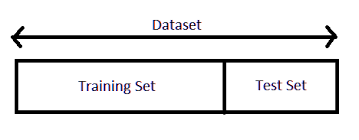

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h2>Train Models</h2>

This is a typical classification problem. <br>
I will select a few scikit classifier models and train them to produce the most accurate model.

<h3>Cross Validation</h3>

<div>
    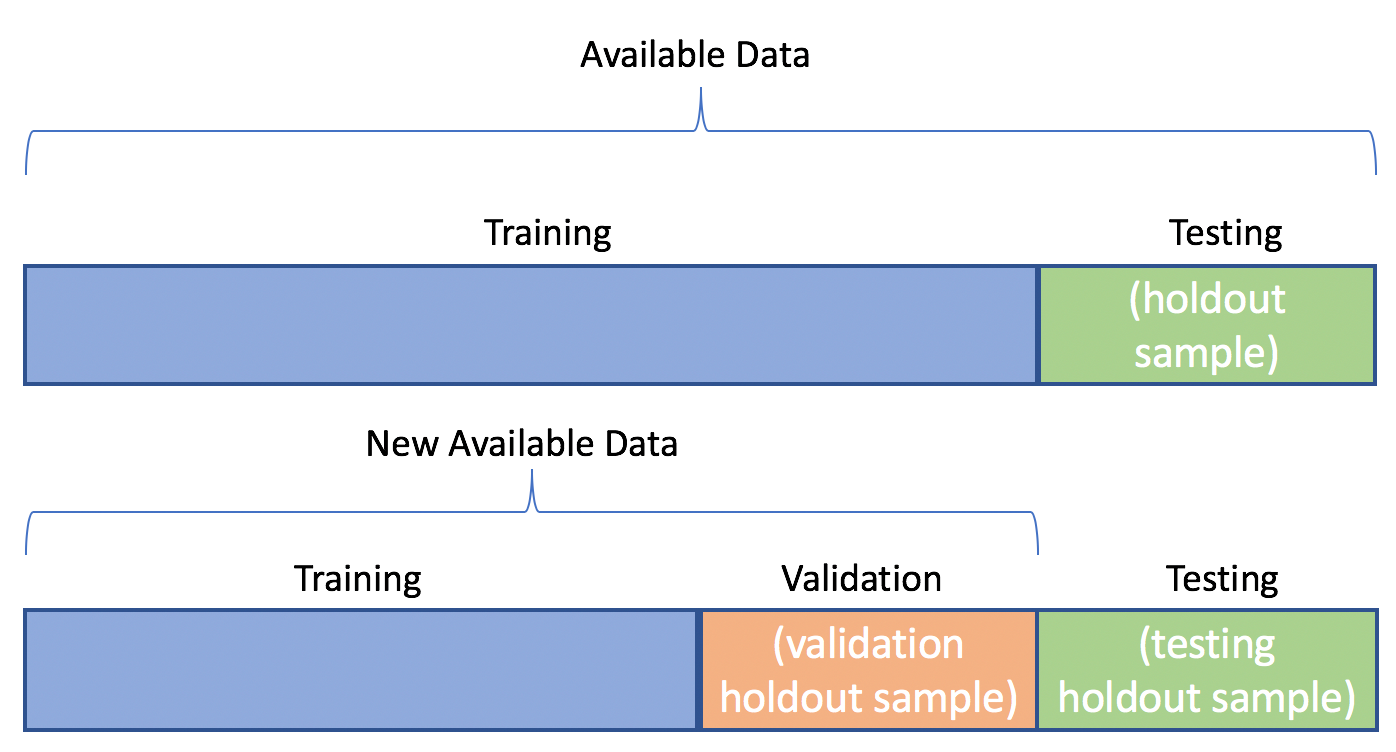
</div>

<div>
    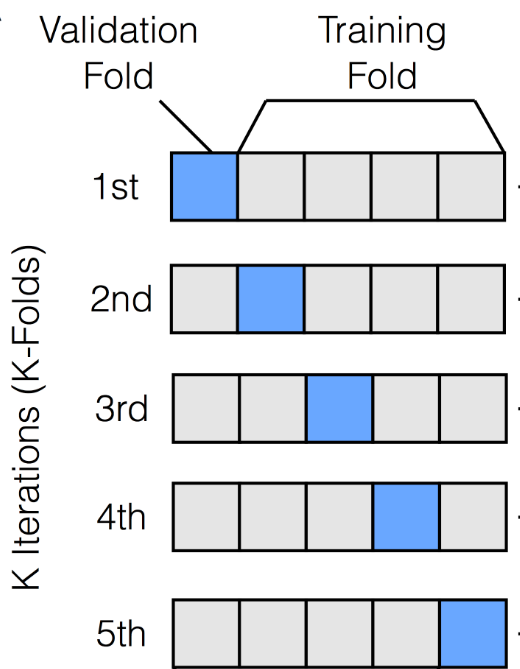
</div>

<h4>Random Forest Classifier</h4>

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest_clf = RandomForestClassifier(random_state=42)
scores = cross_val_score(forest_clf, X_train, y_train, cv=3)
scores.mean()

0.7345580404685835

<h4>KNN Classifier</h4>

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn_clf, X_train, y_train, cv=3)
scores.mean()

0.7074014909478169

<h3>Standardization</h3>

*standardization (standar deviation=1, mean=0)

Support Vector Machine (SVM) optimization occurs by minimizing the dicision vector w, the optimal hyperplane is influenced by the scale of the input features.
Therefore, it is recommended that data be standardized prior to SVM model traning.<br>
https://towardsdatascience.com/effect-of-feature-standardization-on-linear-support-vector-machines-13213765b812?gi=19609985cc77


<div>
    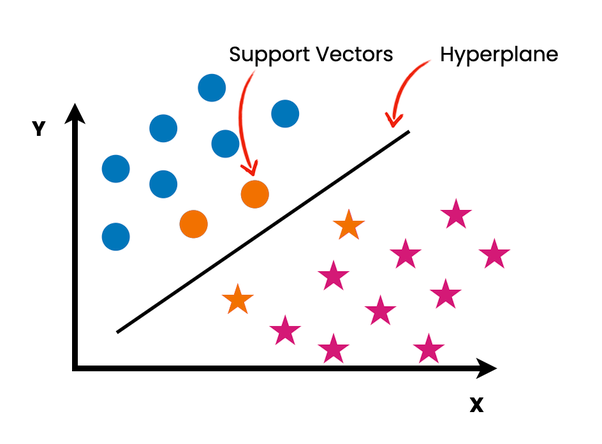
</div>

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

<h4>SVC</h4>

In [25]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
scores = cross_val_score(svm_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')
scores.mean()

0.7220447284345047

<h2> Tuning a Model</h2>

Find a hyperparameter combination for the best performation of a model using GridSearchCV.

<h4>Random Forest Classifier</h4>

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = [
   {
       'n_estimators': [200, 500],
       'max_features': ['auto', 'sqrt', 'log2'],
       'max_depth': [4, 5, 6, 7, 8],
       'criterion': ['gini', 'entropy']
   }
]

randForest_clf = RandomForestClassifier()
grid_search_randForest = GridSearchCV(randForest_clf, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search_randForest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [4, 5, 6, 7, 8],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [200, 500]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [27]:
# best hyperparameter combination
grid_search_randForest.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [28]:
# train the best model
grid_search_randForest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [4, 5, 6, 7, 8],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [200, 500]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [29]:
# get an accuracy score
y_pred = grid_search_randForest.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.6964856230031949


<h4>KNN classifier</h4>

In [30]:
k_range = list(range(1, 11))
scores_knn = []
for k in k_range:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    scores_knn.append(cross_val_score(knn_clf, X_train, y_train, cv=3).mean())

In [31]:
scores_knn

[0.7066027689030884,
 0.6932907348242812,
 0.7193823216187433,
 0.700479233226837,
 0.7074014909478169,
 0.6972843450479234,
 0.7055378061767837,
 0.692758253461129,
 0.6922257720979766,
 0.6900958466453674]

Text(0, 0.5, 'Testing Accuracy')

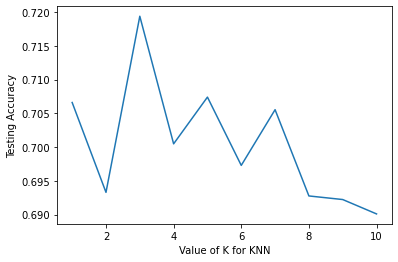

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, scores_knn)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [34]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7167199148029819


In [35]:
print(type(y_pred))
y_pred = pd.DataFrame(y_pred)

<class 'numpy.ndarray'>


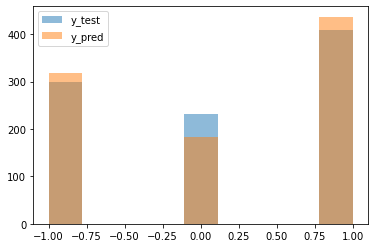

In [36]:
x = y_test
y = y_pred

bins = np.linspace(-1, 1, 10)

plt.hist(x, bins, alpha=0.5, label='y_test')
plt.hist(y, bins, alpha=0.5, label='y_pred')
plt.legend(loc='upper left')
plt.show()

<h2>Error Analysis</h2>

1) Since 'active' and 'inactive' have more cases than 'intermediate', the trained model is biased and is likely to classify new data in either 'active' or 'inactive' class.
For example, let's suppose that there are 95 female and 5 male. If a trained machine classifies every input as a female, it would be still 95% correct.

2) The accuracy score is quite low and does not give us a satisfiable result. Predicting molecule's drug-likeness only using molecular fingerprints is harder than I thought.

3) hard to analysis the pattern. Which factor of fingerprints actually affects the machine to predict whether a molecule is active or not? We need more precise features so that we can dive deeper into the pattern that is found.

4) When I randomly splited the data set into two subsets; a train set and a test set, it may be biased.<br>
<i>" Finally, to demonstrate the utility of this drug-likeness filter, the researchers conducted a series of simulated library design experiments and concluded that their system could dramatically increase the probability of picking drug-like molecules from a large pool of mostly nondrug-like entities. (Journal of Medicinal Chemistry, 1998)."</i> -https://www.ncbi.nlm.nih.gov/books/NBK6404/

<h2>Next Task</h2>

<ol>
    <li>We need to come up with a new evaluation method to corretly measure the machine's accuracy</li>
    <li>Based on the error analysis, improve the performance of a model</li>
    <li>Use different features: compliance of lipinski's rule of five</li>
</ol>

<h2>References</h2>

<ul>
    <li>https://github.com/dataprofessor/bioinformatics_freecodecamp</li>
    <li>https://www.ncbi.nlm.nih.gov/books/NBK6404/</li>
</ul>